<a href="https://colab.research.google.com/github/Neha-Garg2/One-Hot-Encoding/blob/main/Assignment_3_Neha_Garg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/dataset_model.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.corr()

**1. Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe**

In [ ]:
df.columns

In [ ]:
for i in df:
  if df[i].is_unique:
    df = df.drop(i,axis=1)           #dropping loan_Id from dataset
    print(i)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**2. Identifying Continous & Categorical Columns**

In [ ]:
#Continous variable
a = df._get_numeric_data().columns
print(a)
for i in a:
  if len(df[i].unique())>5:
    print(i)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term


In [ ]:
#Categorical variable
for i in df:
  if len(df[i].unique())<=5:
    print(i)

Gender
Married
Dependents
Education
Self_Employed
Credit_History
Property_Area
Loan_Status


**3. Performing Uni-variate Analysis with Plots.Record your Observations**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe60c14e550>,
      dtype=object)

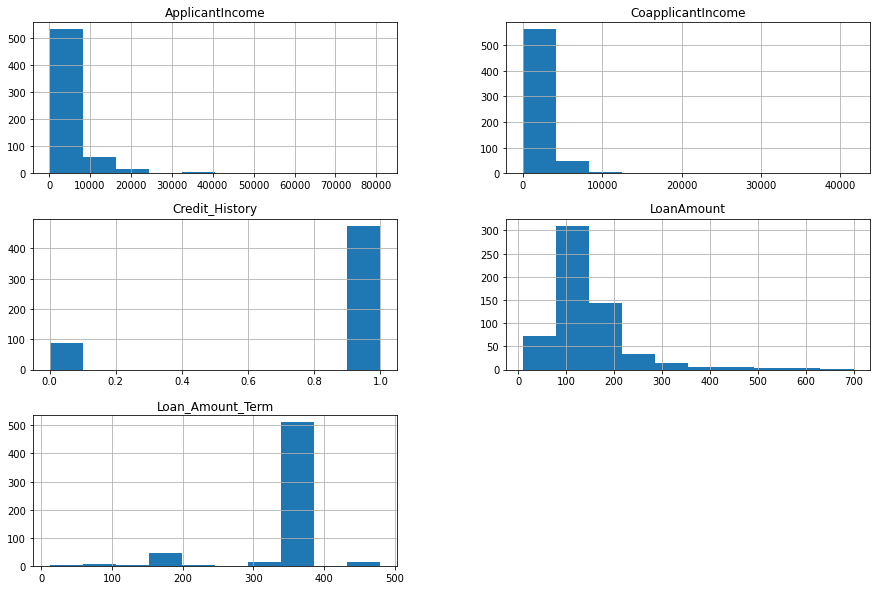

In [ ]:
#Univariate Analysis
df.hist(figsize=[15,10])

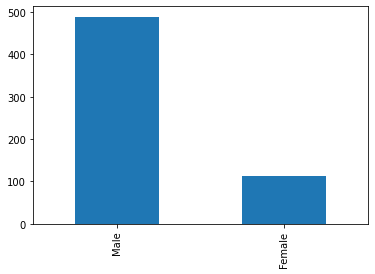

In [ ]:
df['Gender'].value_counts().plot.bar()

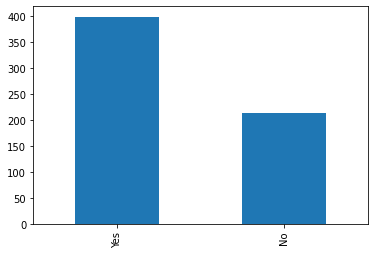

In [ ]:
df['Married'].value_counts().plot.bar()

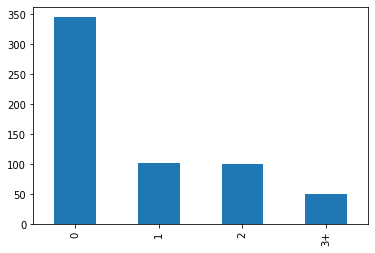

In [ ]:
df['Dependents'].value_counts().plot.bar()

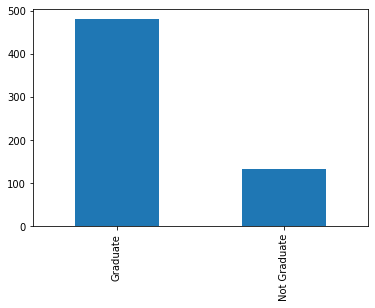

In [ ]:
df['Education'].value_counts().plot.bar()

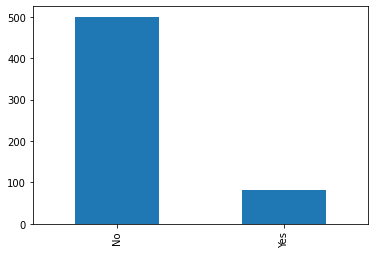

In [ ]:
df['Self_Employed'].value_counts().plot.bar()

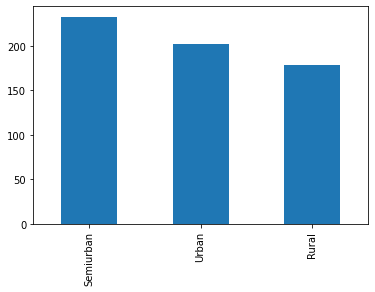

In [ ]:
df['Property_Area'].value_counts().plot.bar()

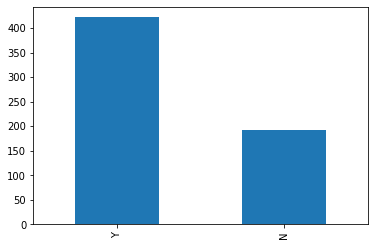

In [ ]:
df['Loan_Status'].value_counts().plot.bar()

**4. Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations**

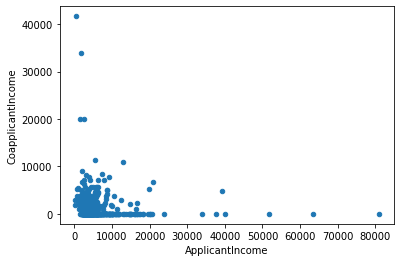

In [ ]:
df.plot.scatter(x='ApplicantIncome', y='CoapplicantIncome')

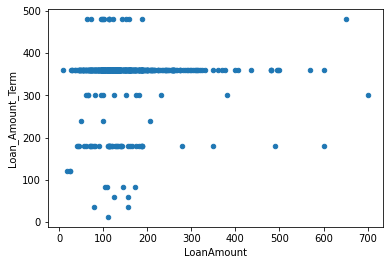

In [ ]:
df.plot.scatter(x='LoanAmount', y='Loan_Amount_Term')

**5. Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc**

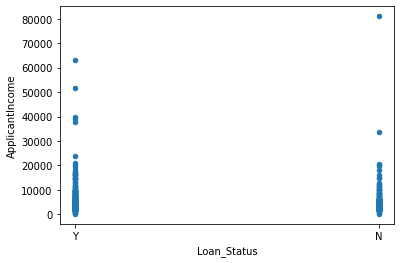

In [ ]:
df.plot.scatter(x='Loan_Status',y='ApplicantIncome')

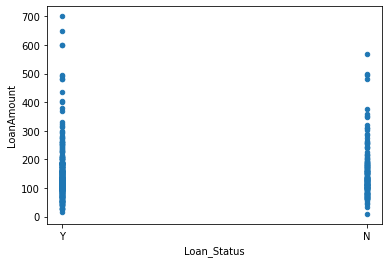

In [ ]:
df.plot.scatter(x='Loan_Status',y='LoanAmount')

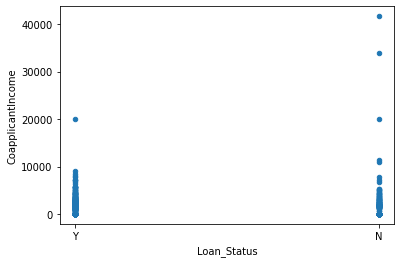

In [ ]:
df.plot.scatter(x='Loan_Status',y='CoapplicantIncome')

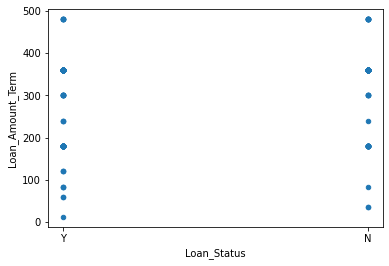

In [ ]:
df.plot.scatter(x='Loan_Status',y='Loan_Amount_Term')

**6.How is the class distribution (Y/N) in Label(Target) Variable ?**

In [ ]:
df.groupby('Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


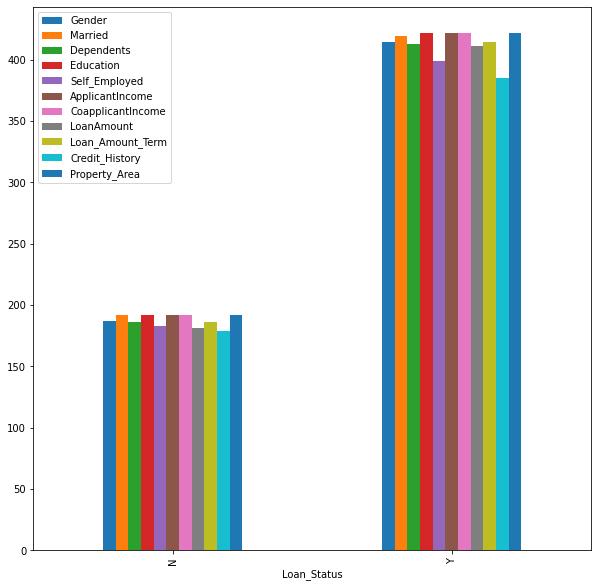

In [ ]:
df.groupby('Loan_Status').count().plot.bar(figsize=[10,10])

**7. Identify the Independent Variables that have missing values.**

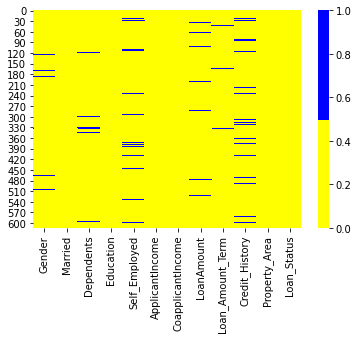

In [ ]:
c = df.columns
colours = ['yellow', 'blue']   
sns.heatmap(df[c].isnull(), cmap=sns.color_palette(colours))

**8. Handle missing values appropriately , explain the technique applied for each case**

**9. Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)**

In [ ]:
print("0 to 25%  \n ",df.quantile(0)) 
print("25% to 50%   \n ",df.quantile(0.25)) 
print("50% to 75% \n ",df.quantile(0.50)) 
print("75% t0 100% \n ",df.quantile(0.75)) 


0 to 25%  
  ApplicantIncome      150.0
CoapplicantIncome      0.0
LoanAmount             0.0
Loan_Amount_Term       0.0
Credit_History         0.0
Loan_Status            0.0
Name: 0, dtype: float64
25% to 50%   
  ApplicantIncome      2877.5
CoapplicantIncome       0.0
LoanAmount             98.0
Loan_Amount_Term      360.0
Credit_History          1.0
Loan_Status             0.0
Name: 0.25, dtype: float64
50% to 75% 
  ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            125.0
Loan_Amount_Term      360.0
Credit_History          1.0
Loan_Status             1.0
Name: 0.5, dtype: float64
75% t0 100% 
  ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Loan_Status             1.00
Name: 0.75, dtype: float64


**10.Use Box-Plot chart to represent the Outliers for each Independent Variable**

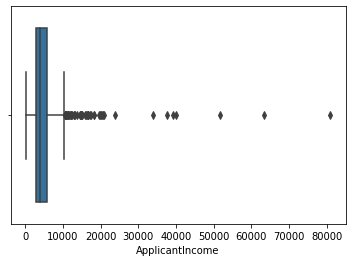

In [ ]:
sns.boxplot(x=df['ApplicantIncome'])


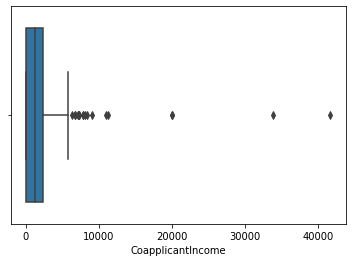

In [ ]:
sns.boxplot(x=df['CoapplicantIncome'])

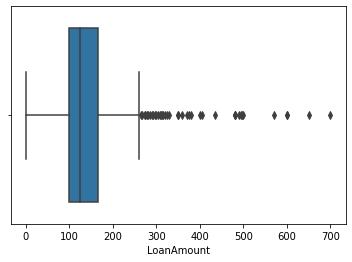

In [ ]:
sns.boxplot(x=df['LoanAmount'])

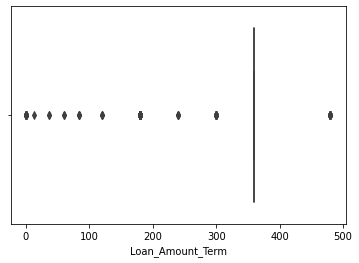

In [ ]:
sns.boxplot(x=df['Loan_Amount_Term'])


**11. Perform treatment of these Outliers using appropriate techniqies.Explain your approach**

**Step-1 Perform Label Encoding on Target Variable (Loan_Status).**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1=df.copy()
df1['Loan_Status'] = le.fit_transform(df1['Loan_Status'])
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


**Step-2**

a) Perform Label Encoding on Categorical Independent Variables. 



In [ ]:
for j in df:
  df1['df1'+str(j)] = le.fit_transform(df1[j])

b)What is the shape of dataframe post Categorical Encoding ?

In [ ]:
df1.shape

(614, 14)

c)Carry out Correlation analysis on this dataframe. Plot using HeatMap

In [ ]:
a=df1.corr()
a
a.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,df1_Gender,df1Gender
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,0.006986,-0.004710,0.058809,0.058809
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,-0.058795,-0.059187,0.082912,0.082912
LoanAmount,0.538290,0.190377,1.000000,0.058519,-0.032711,-0.010631,0.095586,0.095586
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,0.050145,0.007306,-0.049785,-0.049785
Credit_History,0.006986,-0.058795,-0.032711,0.050145,1.000000,0.432616,0.026655,0.026655


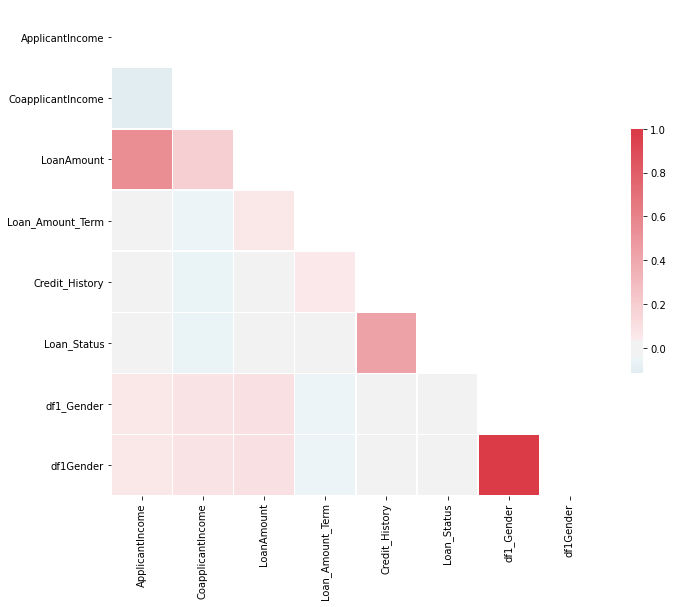

In [ ]:
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(a, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

d)Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)

Strong correlation:

> "Loan_Amount","Loan_Status" etc



**Step-3**

a)Perform One Hot Encoding on Categorical Independent Variables.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe = df1.copy()
df_ohe.head()


b)What is the shape of dataframe post OHE Encoding ?

In [ ]:
df_ohe.shape

(614, 14)

In [ ]:
oheCorr= df_ohe.corr()
oheCorr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,df1_Gender,df1Gender
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,0.006986,-0.004710,0.058809,0.058809
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,-0.058795,-0.059187,0.082912,0.082912
LoanAmount,0.538290,0.190377,1.000000,0.058519,-0.032711,-0.010631,0.095586,0.095586
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,0.050145,0.007306,-0.049785,-0.049785
Credit_History,0.006986,-0.058795,-0.032711,0.050145,1.000000,0.432616,0.026655,0.026655
Loan_Status,-0.004710,-0.059187,-0.010631,0.007306,0.432616,1.000000,0.017987,0.017987
df1_Gender,0.058809,0.082912,0.095586,-0.049785,0.026655,0.017987,1.000000,1.000000
df1Gender,0.058809,0.082912,0.095586,-0.049785,0.026655,0.017987,1.000000,1.000000


c)Carry out Correlation analysis on this dataframe. Plot using HeatMap

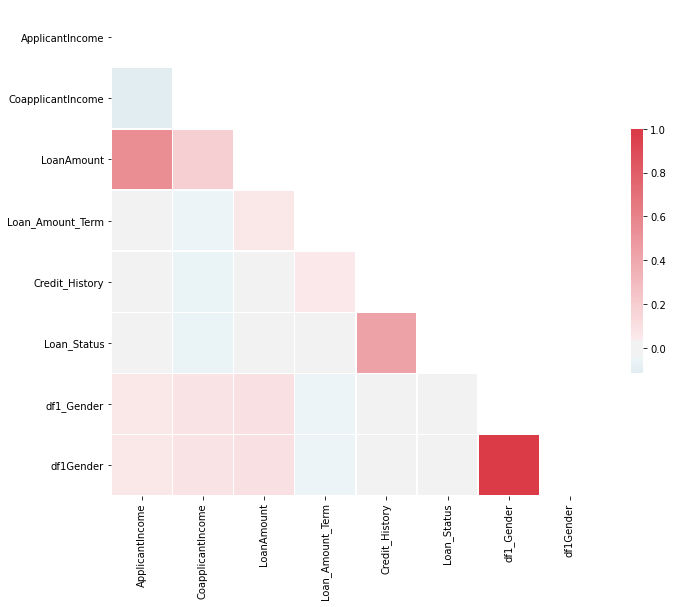

In [ ]:
mask = np.zeros_like(oheCorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

svm = sns.heatmap(oheCorr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

d)Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)

strong correlation

> Credit_History, Gender, Self_Employed, Education, Married 

